In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeat
import datetime
import matplotlib.dates as mdates
# - - - - - - - - - - - - - - -   
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 13
plt.rcParams['lines.linewidth'] = 2
# - - - - - - - - - - - - - - - 
def gline(ax,t=False,b=False,l=False,r=False):
    gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=1, color='black', alpha=0.5, 
                         linestyle='--', draw_labels=True)
    gl.xlabels_top = t
    gl.ylabels_left = l
    gl.ylabels_right=r
    gl.xlabels_bottom = b
    gl.xlines = False
    gl.ylines = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'weight': 'light','family':'serif','size':14}
    gl.ylabel_style = {'weight': 'light','family':'serif','size':14}


In [2]:
def read(file_name = None,sheet=None):
    df = pd.read_excel(file_name,sheet_name=sheet)
    time = pd.DatetimeIndex(pd.to_datetime(df[['year',
                                       'month',
                                       'day']]).astype(str)+' '+
                    df['hr'].astype(str)+':'+df['min'].astype(str))
    df['time'] = time
    df.set_index(time,inplace=True)
    df.drop(['year','month','day','hr','min','time'],axis=1,inplace= True)
    df.filter(like='n').replace(0,np.nan,inplace=True)
    df.interpolate(inplace=True)
    print(df.columns)
    print(df.describe())
    return df

In [3]:
df = pd.read_excel('TEST_daa.xlsx',sheet_name=1)

In [4]:
pd.DatetimeIndex(pd.to_datetime(df[['year',
                                       'month',
                                       'day']]).astype(str)+' '+
                    df['hr'].astype(str)+':'+df['min'].astype(str))

DatetimeIndex(['2015-01-01 00:00:00', '2015-01-01 01:00:00',
               '2015-01-01 02:00:00', '2015-01-01 03:00:00',
               '2015-01-01 04:00:00', '2015-01-01 05:00:00',
               '2015-01-01 06:00:00', '2015-01-01 07:00:00',
               '2015-01-01 08:00:00', '2015-01-01 09:00:00',
               ...
               '2015-12-31 14:00:00', '2015-12-31 15:00:00',
               '2015-12-31 16:00:00', '2015-12-31 17:00:00',
               '2015-12-31 18:00:00', '2015-12-31 19:00:00',
               '2015-12-31 20:00:00', '2015-12-31 21:00:00',
               '2015-12-31 22:00:00', '2015-12-31 23:00:00'],
              dtype='datetime64[ns]', length=8760, freq=None)

In [3]:
df1 = read(file_name='TEST_daa.xlsx',sheet=1)

Index(['u80', 'u82', 'u84', 'u86', 'u88', 'u90', 'u92', 'u94', 'u96', 'u98',
       'u100', 'v80', 'v82', 'v84', 'v86', 'v88', 'v90', 'v92', 'v94', 'v96',
       'v98', 'v100', 'n80', 'n82', 'n84', 'n86', 'n88', 'n90', 'n92', 'n94',
       'n96', 'n98', 'n100'],
      dtype='object')
               u80          u82          u84          u86          u88  \
count  8760.000000  8760.000000  8760.000000  8760.000000  8760.000000   
mean     -0.138636     0.809922     1.606124     1.862954     1.369976   
std      28.122818    29.189418    30.734995    32.121705    33.232891   
min     -91.594109  -100.857918  -130.438232  -120.222427  -112.370163   
25%     -19.691690   -19.049620   -18.721230   -19.340676   -19.921067   
50%       1.097372     2.313200     4.163214     4.292918     3.497938   
75%      20.004913    21.980374    23.304762    24.923391    25.333426   
max      86.542068    97.556656   116.002213   109.540665   125.726082   

               u90          u92          u94    

In [14]:
u = df1[['u80', 'u82', 'u84', 'u86', 'u88', 'u90', 'u92', 'u94', 'u96', 'u98',
       'u100']]

In [15]:
v = df1[['v80', 'v82', 'v84', 'v86', 'v88', 'v90', 'v92', 'v94', 'v96',
       'v98', 'v100']]

In [16]:
n = df1[['n80', 'n82', 'n84', 'n86', 'n88', 'n90', 'n92', 'n94',
       'n96', 'n98', 'n100']]

In [17]:
df1.columns

Index(['u80', 'u82', 'u84', 'u86', 'u88', 'u90', 'u92', 'u94', 'u96', 'u98',
       'u100', 'v80', 'v82', 'v84', 'v86', 'v88', 'v90', 'v92', 'v94', 'v96',
       'v98', 'v100', 'n80', 'n82', 'n84', 'n86', 'n88', 'n90', 'n92', 'n94',
       'n96', 'n98', 'n100'],
      dtype='object')

In [18]:
df = pd.read_excel('TEST_daa.xlsx')

In [19]:
df

,year,month,day,hr,min,u80,u82,u84,u86,u88,...,n82,n84,n86,n88,n90,n92,n94,n96,n98,n100
0,2015,1,1,0,0,53.294476,42.613903,34.326664,16.510151,13.717862,...,37.0,60.0,103.0,149.0,218.0,241.0,182.0,151.0,108.0,41.0
1,2015,1,1,0,15,46.841404,43.560787,29.621698,29.266411,27.987242,...,38.0,71.0,116.0,160.0,205.0,221.0,180.0,133.0,88.0,44.0
2,2015,1,1,0,30,53.496601,46.836506,43.011112,42.025249,35.342178,...,35.0,66.0,124.0,178.0,220.0,241.0,211.0,152.0,98.0,54.0
3,2015,1,1,0,45,40.073162,36.337650,42.015984,40.668530,40.005600,...,23.0,67.0,114.0,155.0,194.0,220.0,204.0,163.0,114.0,60.0
4,2015,1,1,1,0,52.523598,49.603962,47.722305,52.910084,45.039394,...,37.0,52.0,96.0,152.0,219.0,254.0,231.0,187.0,110.0,54.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35035,2015,12,31,22,45,NaN,13.487217,48.893867,58.532688,61.735966,...,20.0,37.0,74.0,125.0,193.0,220.0,206.0,149.0,73.0,38.0
35036,2015,12,31,23,0,10.738343,28.923750,33.723774,51.026566,61.160709,...,33.0,50.0,78.0,137.0,197.0,212.0,207.0,149.0,75.0,46.0
35037,2015,12,31,23,15,NaN,31.354868,29.512102,50.642971,65.518562,...,27.0,48.0,74.0,124.0,182.0,204.0,187.0,133.0,82.0,44.0
35038,2015,12,31,23,30,NaN,22.408697,52.908779,60.821907,58.003536,...,36.0,62.0,101.0,127.0,154.0,179.0,155.0,109.0,69.0,36.0


In [20]:
df.columns

Index(['year', 'month', 'day', 'hr', 'min', 'u80', 'u82', 'u84', 'u86', 'u88',
       'u90', 'u92', 'u94', 'u96', 'u98', 'u100', 'v80', 'v82', 'v84', 'v86',
       'v88', 'v90', 'v92', 'v94', 'v96', 'v98', 'v100', 'n80', 'n82', 'n84',
       'n86', 'n88', 'n90', 'n92', 'n94', 'n96', 'n98', 'n100'],
      dtype='object')

In [21]:
time = pd.DatetimeIndex(pd.to_datetime(df[['year',
                                           'month',
                                           'day']]).astype(str)+'T'+
                        df['hr'].astype(str)+':'+df['min'].astype(str))

In [22]:
df['time'] = time

In [23]:
df.set_index(time,inplace=True)

In [24]:
u.shape

(8760, 11)

In [25]:
v.shape

(8760, 11)

<AxesSubplot:>

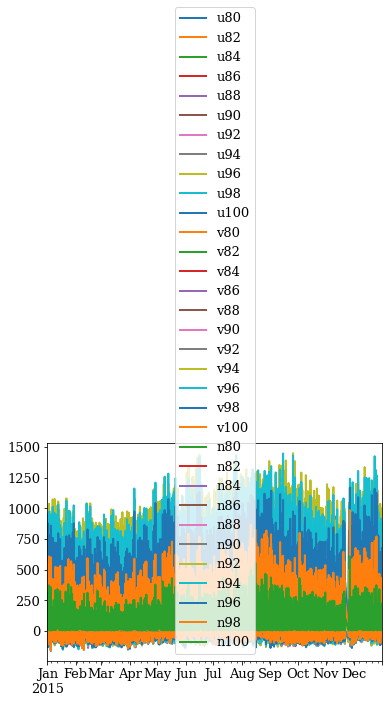

In [26]:
df1.plot()

In [27]:
n.shape

(8760, 11)

<AxesSubplot:>

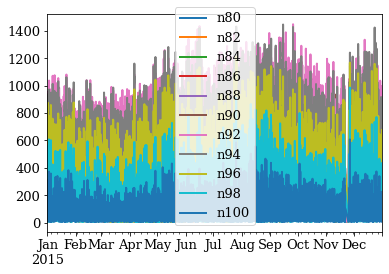

In [28]:
n.plot()

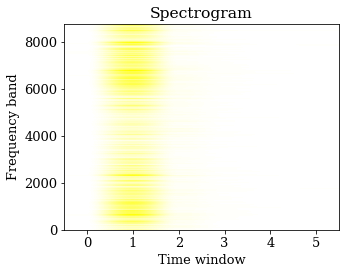

In [29]:
from scipy import signal
freqs, times, spectrogram = signal.spectrogram(u,fs = 1/len(u))
plt.figure(figsize=(5, 4))
plt.imshow(spectrogram, aspect='auto', cmap='hot_r', origin='lower')
plt.title('Spectrogram')
plt.ylabel('Frequency band')
plt.xlabel('Time window')
plt.tight_layout()

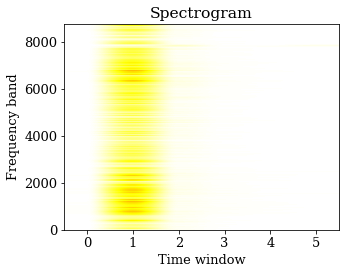

In [30]:
freqs, times, spectrogram = signal.spectrogram(v,fs = 1/len(v))
plt.figure(figsize=(5, 4))
plt.imshow(spectrogram, aspect='auto', cmap='hot_r', origin='lower')
plt.title('Spectrogram')
plt.ylabel('Frequency band')
plt.xlabel('Time window')
plt.tight_layout()

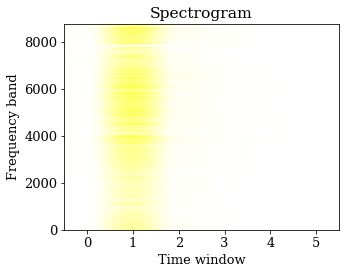

In [31]:
freqs, times, spectrogram = signal.spectrogram(n,fs=1/len(n))
plt.figure(figsize=(5, 4))
plt.imshow(spectrogram, aspect='auto', cmap='hot_r', origin='lower')
plt.title('Spectrogram')
plt.ylabel('Frequency band')
plt.xlabel('Time window')
plt.tight_layout()

In [32]:
df1.index

DatetimeIndex(['2015-01-01 00:00:00', '2015-01-01 01:00:00',
               '2015-01-01 02:00:00', '2015-01-01 03:00:00',
               '2015-01-01 04:00:00', '2015-01-01 05:00:00',
               '2015-01-01 06:00:00', '2015-01-01 07:00:00',
               '2015-01-01 08:00:00', '2015-01-01 09:00:00',
               ...
               '2015-12-31 14:00:00', '2015-12-31 15:00:00',
               '2015-12-31 16:00:00', '2015-12-31 17:00:00',
               '2015-12-31 18:00:00', '2015-12-31 19:00:00',
               '2015-12-31 20:00:00', '2015-12-31 21:00:00',
               '2015-12-31 22:00:00', '2015-12-31 23:00:00'],
              dtype='datetime64[ns]', length=8760, freq=None)

In [33]:
if np.nan not in df1:
    print('good to go')
else: print('Replace NaN')

good to go


In [34]:
xdf = df1.to_xarray().rename({'index':'time'})

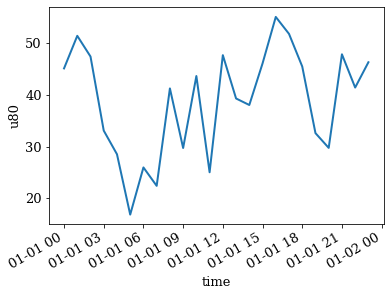

In [35]:
xdf.sel(time=('2015-01-01'))['u80'].plot()

In [36]:
fs = 24
N = len(u.iloc[:,0])

In [37]:
1/(1*24*365)

0.00011415525114155251

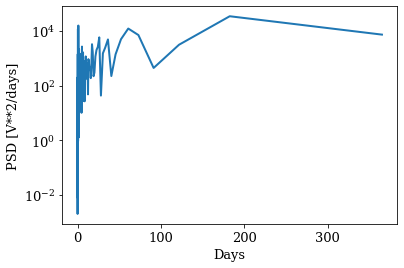

In [38]:
f, Pxx_den = signal.periodogram(u.iloc[:,2], fs)
plt.semilogy(1/f, Pxx_den)
# plt.ylim([1e-1, 1e9])
# plt.xlim(1,1.15)
plt.xlabel('Days')
plt.ylabel('PSD [V**2/days]')
plt.show()

In [39]:
nyq = 0.5 * fs

In [40]:
2.73972603e-03

0.00273972603

In [41]:
from astropy.timeseries import LombScargle

In [42]:
f

array([0.00000000e+00, 2.73972603e-03, 5.47945205e-03, ...,
       1.19945205e+01, 1.19972603e+01, 1.20000000e+01])

In [43]:
dat = u.iloc[:,0]
t0 = 0
fs = 24
dt = 1/fs   # In years
N = len(dat)
t = np.arange(0, N)* dt + t0

In [56]:
dsx = df.to_xarray()

In [58]:
dsx

<xarray.Dataset>
Dimensions:  (index: 35040)
Coordinates:
  * index    (index) datetime64[ns] 2015-01-01 ... 2015-12-31T23:45:00
Data variables: (12/39)
    year     (index) int64 2015 2015 2015 2015 2015 ... 2015 2015 2015 2015 2015
    month    (index) int64 1 1 1 1 1 1 1 1 1 1 ... 12 12 12 12 12 12 12 12 12 12
    day      (index) int64 1 1 1 1 1 1 1 1 1 1 ... 31 31 31 31 31 31 31 31 31 31
    hr       (index) int64 0 0 0 0 1 1 1 1 2 2 ... 21 21 22 22 22 22 23 23 23 23
    min      (index) int64 0 15 30 45 0 15 30 45 0 ... 45 0 15 30 45 0 15 30 45
    u80      (index) float64 53.29 46.84 53.5 40.07 ... 10.74 nan nan 19.01
    ...       ...
    n92      (index) float64 241.0 221.0 241.0 220.0 ... 212.0 204.0 179.0 155.0
    n94      (index) float64 182.0 180.0 211.0 204.0 ... 207.0 187.0 155.0 148.0
    n96      (index) float64 151.0 133.0 152.0 163.0 ... 149.0 133.0 109.0 94.0
    n98      (index) float64 108.0 88.0 98.0 114.0 110.0 ... 75.0 82.0 69.0 55.0
    n100     (index) float64 41.0 44.0 54.0 60.0 54.0 ... 46.0 44.0 36.0 39.0
    time     (index) datetime64[ns] 2015-01-01 ... 2015-12-31T23:45:00

In [59]:
frequency, power = LombScargle(t, dat.values).autopower()

Text(0, 0.5, 'Log power')

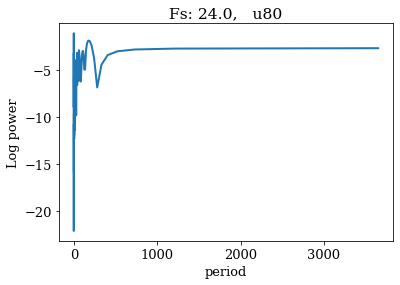

In [60]:
plt.plot(1/frequency,np.log(power))
plt.title('Fs: '+str(1/dt)+ ',   '+dat.name)
plt.xlabel('period')
plt.ylabel('Log power')


In [61]:
from __future__ import division
from matplotlib import pyplot
import pycwt as wavelet
from pycwt.helpers import find

In [62]:
title = 'Zonal Wind'
label = 'u'
units = 'm/s'
fs = 24

dat = u.iloc[:,0]
t0 = 0
dt = 1/fs  # In years
N = len(dat)
t = np.arange(0, N)* dt + t0

p = np.polyfit(t - t0, dat, 1)
dat_notrend = dat - np.polyval(p, t - t0)
std = dat_notrend.std()  # Standard deviation
var = std ** 2  # Variance
dat_norm = dat_notrend / std  # Normalized dataset

In [63]:
mother = wavelet.Morlet(6)
s0 = 2 * dt  # Starting scale, in this case 2 * 0.25 years = 6 months
dj = 1 / 12  # Twelve sub-octaves per octaves
J = 7 / dj  # Seven powers of two with dj sub-octaves
alpha, _, _ = wavelet.ar1(dat)  # Lag-1 autocorrelation for red noise

wave, scales, freqs, coi, fft, fftfreqs = wavelet.cwt(dat_norm.values, dt, dj, s0, J,
                                                      mother)
iwave = wavelet.icwt(wave, scales, dt, dj, mother) * std

power = (np.abs(wave)) ** 2
fft_power = np.abs(fft) ** 2
period = 1 / freqs


power /= scales[:, None]

signif, fft_theor = wavelet.significance(1.0, dt, scales, 0, alpha,
                                         significance_level=0.95,
                                         wavelet=mother)
sig95 = np.ones([1, N]) * signif[:, None]
sig95 = power / sig95

glbl_power = power.mean(axis=1)
dof = N - scales  # Correction for padding at edges
glbl_signif, tmp = wavelet.significance(var, dt, scales, 1, alpha,
                                        significance_level=0.95, dof=dof,
                                        wavelet=mother)

sel = find((period >= 0.15) & (period < 1.8))
Cdelta = mother.cdelta
scale_avg = (scales * np.ones((N, 1))).transpose()
scale_avg = power / scale_avg  # As in Torrence and Compo (1998) equation 24
scale_avg = var * dj * dt / Cdelta * scale_avg[sel, :].sum(axis=0)
scale_avg_signif, tmp = wavelet.significance(var, dt, scales, 2, alpha,
                                             significance_level=0.95,
                                             dof=[scales[sel[0]],
                                                  scales[sel[-1]]],
                                             wavelet=mother)

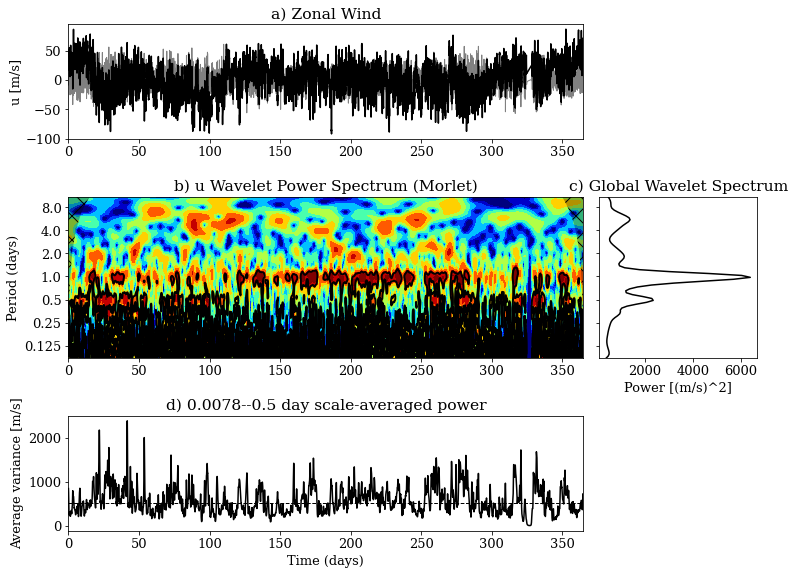

In [64]:
# Prepare the figure
plt.close('all')
plt.ioff()
figprops = dict(figsize=(11, 8), dpi=72)
fig = plt.figure(**figprops)

# First sub-plot, the original time series anomaly and inverse wavelet
# transform.
ax = plt.axes([0.1, 0.75, 0.65, 0.2])
ax.plot(t, iwave, '-', linewidth=1, color=[0.5, 0.5, 0.5])
ax.plot(t, dat, 'k', linewidth=1.5)
ax.set_title('a) {}'.format(title))
ax.set_ylabel(r'{} [{}]'.format(label, units))

# Second sub-plot, the normalized wavelet power spectrum and significance
# level contour lines and cone of influece hatched area. Note that period
# scale is logarithmic.
bx = plt.axes([0.1, 0.37, 0.65, 0.28], sharex=ax)
levels = [0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8, 16]
bx.contourf(t, np.log2(period), np.log2(power), np.log2(levels),
            extend='both', cmap=plt.cm.jet)
extent = [t.min(), t.max(), 0, max(period)]
bx.contour(t, np.log2(period), sig95, [-99, 1], colors='k', linewidths=2,
           extent=extent)
bx.fill(np.concatenate([t, t[-1:] + dt, t[-1:] + dt,
                           t[:1] - dt, t[:1] - dt]),
        np.concatenate([np.log2(coi), [1e-9], np.log2(period[-1:]),
                           np.log2(period[-1:]), [1e-9]]),
        'k', alpha=0.3, hatch='x')
bx.set_title('b) {} Wavelet Power Spectrum ({})'.format(label, mother.name))
bx.set_ylabel('Period (days)')
#
Yticks = 2 ** np.arange(np.ceil(np.log2(period.min())),
                           np.ceil(np.log2(period.max())))
bx.set_yticks(np.log2(Yticks))
bx.set_yticklabels(Yticks)

# Third sub-plot, the global wavelet and Fourier power spectra and theoretical
# noise spectra. Note that period scale is logarithmic.
cx = plt.axes([0.77, 0.37, 0.2, 0.28], sharey=bx)
# cx.plot(glbl_signif, np.log2(period), 'k--')
# cx.plot(var * fft_theor, np.log2(period), '--', color='#cccccc')
# cx.plot(var * fft_power, np.log2(1./fftfreqs), '-', color='#cccccc',
#         linewidth=1.)
cx.plot(var * glbl_power, np.log2(period), 'k-', linewidth=1.5)
cx.set_title('c) Global Wavelet Spectrum')
cx.set_xlabel(r'Power [({})^2]'.format(units))
# cx.set_xlim([0, glbl_power.max() + var])
cx.set_ylim(np.log2([period.min(), period.max()]))
cx.set_yticks(np.log2(Yticks))
cx.set_yticklabels(Yticks)
plt.setp(cx.get_yticklabels(), visible=False)

# Fourth sub-plot, the scale averaged wavelet spectrum.
dx = plt.axes([0.1, 0.07, 0.65, 0.2], sharex=ax)
dx.axhline(scale_avg_signif, color='k', linestyle='--', linewidth=1.)
dx.plot(t, scale_avg, 'k-', linewidth=1.5)
dx.set_title('d) {}--{} day scale-averaged power'.format(0.0078, 0.5))
dx.set_xlabel('Time (days)')
dx.set_ylabel(r'Average variance [{}]'.format(units))
ax.set_xlim([t.min(), t.max()])
plt.show()

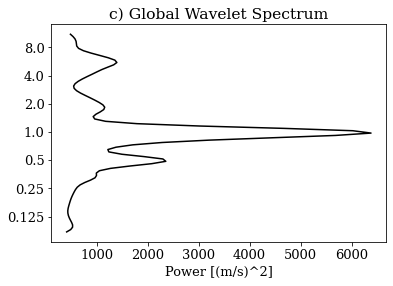

In [65]:
cx = plt.axes()
# cx.plot(glbl_signif, np.log2(period), 'k--')
# cx.plot(var * fft_theor, np.log2(period), '--', color='#cccccc')
# cx.plot(var * fft_power, np.log2(1./fftfreqs), '-', color='#cccccc',
#         linewidth=1.)
cx.plot(var * glbl_power, np.log2(period), 'k-', linewidth=1.5)
cx.set_title('c) Global Wavelet Spectrum')
cx.set_xlabel(r'Power [({})^2]'.format(units))
# cx.set_xlim([0, glbl_power.max() + var])
# cx.set_ylim(np.log2([period.min(), period.max()]))
cx.set_yticks(np.log2(Yticks))
cx.set_yticklabels(Yticks)
plt.setp(cx.get_yticklabels(), visible=True)
plt.draw()

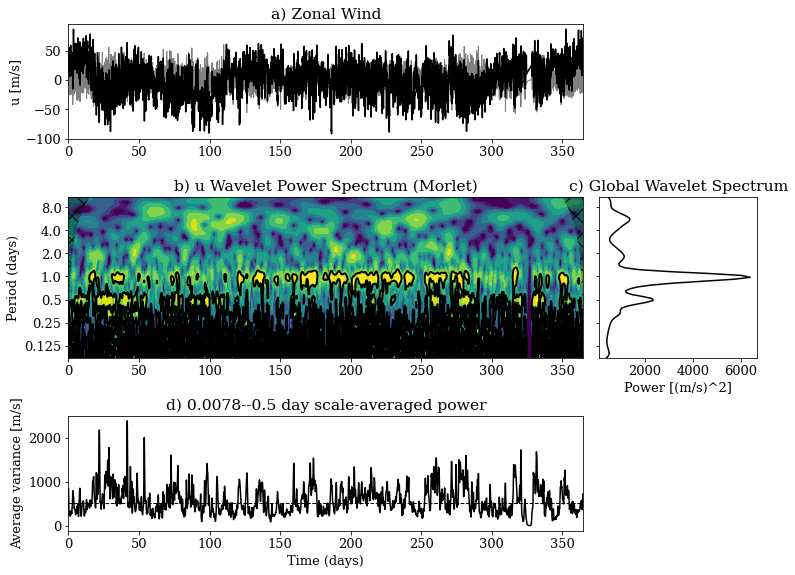

In [66]:
# Prepare the figure
plt.close('all')
plt.ioff()
figprops = dict(figsize=(11, 8), dpi=72)
fig = plt.figure(**figprops)

# First sub-plot, the original time series anomaly and inverse wavelet
# transform.
ax = plt.axes([0.1, 0.75, 0.65, 0.2])
ax.plot(t, iwave, '-', linewidth=1, color=[0.5, 0.5, 0.5])
ax.plot(t, dat, 'k', linewidth=1.5)
ax.set_title('a) {}'.format(title))
ax.set_ylabel(r'{} [{}]'.format(label, units))

# Second sub-plot, the normalized wavelet power spectrum and significance
# level contour lines and cone of influece hatched area. Note that period
# scale is logarithmic.
bx = plt.axes([0.1, 0.37, 0.65, 0.28], sharex=ax)
levels = [0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8, 16]
bx.contourf(t, np.log2(period), np.log2(power), np.log2(levels),
            extend='both', cmap=plt.cm.viridis)
extent = [t.min(), t.max(), 0, max(period)]
bx.contour(t, np.log2(period), sig95, [-99, 1], colors='k', linewidths=2,
           extent=extent)
bx.fill(np.concatenate([t, t[-1:] + dt, t[-1:] + dt,
                           t[:1] - dt, t[:1] - dt]),
        np.concatenate([np.log2(coi), [1e-9], np.log2(period[-1:]),
                           np.log2(period[-1:]), [1e-9]]),
        'k', alpha=0.3, hatch='x')
bx.set_title('b) {} Wavelet Power Spectrum ({})'.format(label, mother.name))
bx.set_ylabel('Period (days)')
#
Yticks = 2 ** np.arange(np.ceil(np.log2(period.min())),
                           np.ceil(np.log2(period.max())))
bx.set_yticks(np.log2(Yticks))
bx.set_yticklabels(Yticks)

# Third sub-plot, the global wavelet and Fourier power spectra and theoretical
# noise spectra. Note that period scale is logarithmic.
cx = plt.axes([0.77, 0.37, 0.2, 0.28], sharey=bx)
# cx.plot(glbl_signif, np.log2(period), 'k--')
# cx.plot(var * fft_theor, np.log2(period), '--', color='#cccccc')
# cx.plot(var * fft_power, np.log2(1./fftfreqs), '-', color='#cccccc',
#         linewidth=1.)
cx.plot(var * glbl_power, np.log2(period), 'k-', linewidth=1.5)
cx.set_title('c) Global Wavelet Spectrum')
cx.set_xlabel(r'Power [({})^2]'.format(units))
# cx.set_xlim([0, glbl_power.max() + var])
cx.set_ylim(np.log2([period.min(), period.max()]))
cx.set_yticks(np.log2(Yticks))
cx.set_yticklabels(Yticks)
plt.setp(cx.get_yticklabels(), visible=False)

# Fourth sub-plot, the scale averaged wavelet spectrum.
dx = plt.axes([0.1, 0.07, 0.65, 0.2], sharex=ax)
dx.axhline(scale_avg_signif, color='k', linestyle='--', linewidth=1.)
dx.plot(t, scale_avg, 'k-', linewidth=1.5)
dx.set_title('d) {}--{} day scale-averaged power'.format(0.0078, 0.5))
dx.set_xlabel('Time (days)')
dx.set_ylabel(r'Average variance [{}]'.format(units))
ax.set_xlim([t.min(), t.max()])

plt.show()

In [67]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

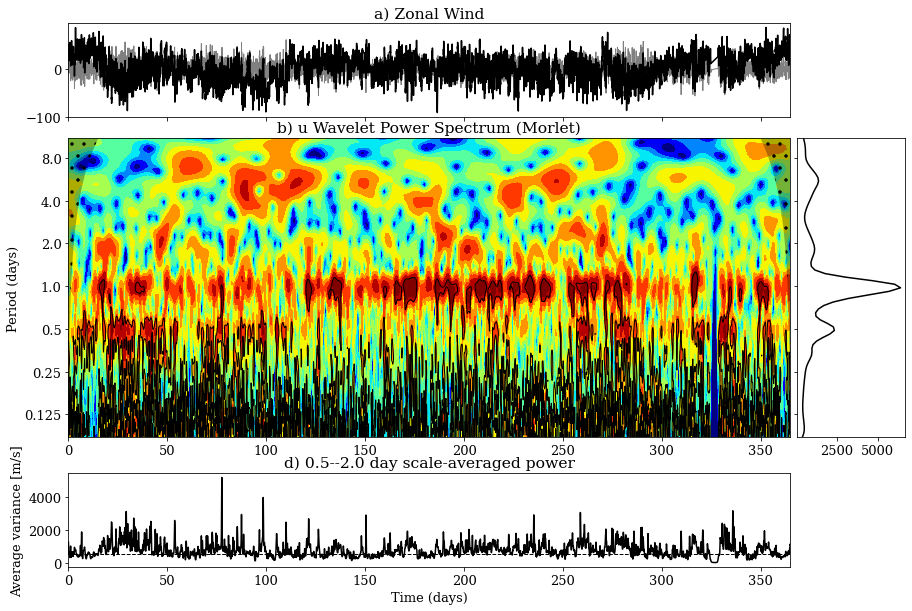

In [68]:
title = 'Zonal Wind'
label = 'u'
units = 'm/s'
fs = 24

dat = u.iloc[:,0]
t0 = 0
dt = 1/fs  # In years
N = len(dat)
t = np.arange(0, N)* dt + t0

p = np.polyfit(t - t0, dat, 1)
dat_notrend = dat - np.polyval(p, t - t0)
std = dat_notrend.std()  # Standard deviation
var = std ** 2  # Variance
dat_norm = dat_notrend / std  # Normalized dataset
mother = wavelet.Morlet(6)
s0 = 2 * dt  # Starting scale, in this case 2 * 0.25 years = 6 months
dj = 1 / 12  # Twelve sub-octaves per octaves
J = 7 / dj  # Seven powers of two with dj sub-octaves
alpha, _, _ = wavelet.ar1(dat)  # Lag-1 autocorrelation for red noise
wave, scales, freqs, coi, fft, fftfreqs = wavelet.cwt(dat_norm.values, dt, dj, s0, J,
                                                      mother)
iwave = wavelet.icwt(wave, scales, dt, dj, mother) * std
power = (np.abs(wave)) ** 2
fft_power = np.abs(fft) ** 2
period = 1 / freqs
power /= scales[:, None]
signif, fft_theor = wavelet.significance(1.0, dt, scales, 0, alpha,
                                         significance_level=0.99,
                                         wavelet=mother)
sig95 = np.ones([1, N]) * signif[:, None]
sig95 = power / sig95

glbl_power = power.mean(axis=1)
dof = N - scales  # Correction for padding at edges
glbl_signif, tmp = wavelet.significance(var, dt, scales, 1, alpha,
                                        significance_level=0.95, dof=dof,
                                        wavelet=mother)
sel = find((period >= 0.015) & (period < 1.8))
Cdelta = mother.cdelta
scale_avg = (scales * np.ones((N, 1))).transpose()
scale_avg = power / scale_avg  # As in Torrence and Compo (1998) equation 24
scale_avg = var * dj * dt / Cdelta * scale_avg[sel, :].sum(axis=0)
scale_avg_signif, tmp = wavelet.significance(var, dt, scales, 2, alpha,
                                             significance_level=0.95,
                                             dof=[scales[sel[0]],
                                                  scales[sel[-1]]],
                                             wavelet=mother)
fig, ax = plt.subplots(figsize=(15,10))
# ax.set_aspect(1.)
levels = [0.015, 0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8, 16]
ax.contourf(t, np.log2(period), np.log2(power), np.log2(levels),
            extend='both', cmap=plt.cm.jet)
extent = [t.min(), t.max(), 0, max(period)]
ax.contour(t, np.log2(period), sig95, [-99, 1], colors='k', linewidths=1,
           extent=extent)
ax.fill(np.concatenate([t, t[-1:] + dt, t[-1:] + dt,
                           t[:1] - dt, t[:1] - dt]),
        np.concatenate([np.log2(coi), [1e-9], np.log2(period[-1:]),
                           np.log2(period[-1:]), [1e-9]]),
        'k', alpha=0.3, hatch='.')
ax.set_title('b) {} Wavelet Power Spectrum ({})'.format(label, mother.name))
ax.set_ylabel('Period (days)')
#
Yticks = 2 ** np.arange(np.ceil(np.log2(period.min())),
                           np.ceil(np.log2(period.max())))
ax.set_yticks(np.log2(Yticks))
ax.set_yticklabels(Yticks)
# create new axes on the right and on the top of the current axes
divider = make_axes_locatable(ax)
# below height and pad are in inches
ax_t = divider.append_axes("top", 1.3, pad=0.3, sharex=ax)
ax_r = divider.append_axes("right", 1.5, pad=0.1, sharey=ax)
ax_b = divider.append_axes("bottom", 1.3, pad=0.5, sharex=ax)
# make some labels invisible
ax_t.xaxis.set_tick_params(labelbottom=False)
ax_r.yaxis.set_tick_params(labelleft=False)
ax_t.plot(t, iwave, '-', linewidth=1, color=[0.5, 0.5, 0.5])
ax_t.plot(t, dat, 'k', linewidth=1.5)
ax_t.set_title('a) {}'.format(title))
ax_t.set_ylabel(r'{} [{}]'.format(label, units))
ax_r.plot(var * glbl_power, np.log2(period), 'k-', linewidth=1.5)
ax_r.set_title('c) Global Wavelet Spectrum')
ax_r.set_xlabel(r'Power [({})^2]'.format(units))
# ax_r.set_xlim([0, glbl_power.max() + var])
ax_r.set_ylim(np.log2([period.min(), period.max()]))
ax_r.set_yticks(np.log2(Yticks))
ax_r.set_yticklabels(Yticks)
plt.setp(ax_r.get_yticklabels(), visible=False)
ax_r.set_title(None)
ax_r.set_xlabel(None);ax_r.set_ylabel(None);ax_t.set_xlabel(None);ax_t.set_ylabel(None)
# Fourth sub-plot, the scale averaged wavelet spectrum.
ax_b.axhline(scale_avg_signif, color='k', linestyle='--', linewidth=1.)
ax_b.plot(t, scale_avg, 'k-', linewidth=1.5)
ax_b.set_title('d) {}--{} day scale-averaged power'.format(0.5, 2.0))
ax_b.set_xlabel('Time (days)')
ax_b.set_ylabel(r'Average variance [{}]'.format(units))
ax.set_xlim([t.min(), t.max()])
plt.show()

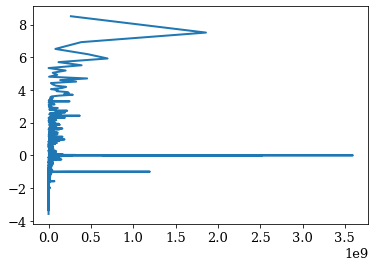

In [69]:
sampling_rate = 24.

time = np.arange(0, 365, 1/sampling_rate)

data = df1.iloc[:,4]

fourier_transform = np.fft.rfft(data)

abs_fourier_transform = np.abs(fourier_transform)

power_spectrum = np.square(abs_fourier_transform)

frequency = np.linspace(0, sampling_rate/2, len(power_spectrum))

plt.plot(power_spectrum,np.log2(1/frequency))

In [70]:
def dftime(df):
    time = pd.DatetimeIndex(pd.to_datetime(df[['year',
                                           'month',
                                           'day']]).astype(str)+'T'+
                        df['hr'].astype(str)+':'+df['min'].astype(str))
    df['time'] = time
    df.set_index('time',inplace = True)
    df.drop(['year','month','day','hr','min'],axis=1,inplace= True)
    df.filter(n).replace(0, np.nan, inplace = True)
    df.interpolate(inplace = True)
    return df